In [17]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv('../master.csv', index_col='date', parse_dates=True, date_format='%m/%d/%y')

Used to determine whether dataset is stationary or not

In [19]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num of Lags : ", dftest[2])
    print("4. Num of Observations Used for ADF Regression and Critical Values Calculation : ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

In [20]:
df['close'] = (np.log(df['close'])).diff()
df.dropna(inplace=True, subset=['close'])

In [21]:
ad_test(df['close'])

1. ADF :  -5.88621092057867
2. P-Value :  2.9974276204760264e-07
3. Num of Lags :  8
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  234
5. Critical Values : 
	 1% :  -3.4586084859607156
	 5% :  -2.873972159235721
	 10% :  -2.57339565928848


In [22]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [23]:
stepwise_fit = auto_arima(df['close'],trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1104.577, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1093.029, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1092.639, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1092.565, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1093.950, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1089.505, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1088.713, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1093.945, Time=0.15 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1104.332, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1090.482, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1089.600, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1089.123, Time=0.06 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1102.199, Time=0.23 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1104.627, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(2, 0, 3)   Log Likelihood                 558.701
Date:                Sun, 15 Oct 2023   AIC                          -1105.403
Time:                        19:33:07   BIC                          -1084.445
Sample:                             0   HQIC                         -1096.961
                                - 243                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1765      0.084     -2.094      0.036      -0.342      -0.011
ar.L2         -0.7870      0.076    -10.354      0.000      -0.936      -0.638
ma.L1          0.0967      0.091      1.068      0.286      -0.081       0.274
ma.L2          0.8723      0.070     12.445      0.000       0.735       1.010
ma.L3          0.0989      0.040      2.477      0.013       0.021       0.177
sigma2         0.0006   2.62e-05     22.407      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1263.94
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.43   Skew:                            -2.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
train = df.iloc[:-30]
test = df.iloc[-30:]

In [30]:
model = ARIMA(train['close'], order = (2,0,3))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  213
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 482.083
Date:                Sun, 15 Oct 2023   AIC                           -950.165
Time:                        19:34:18   BIC                           -926.636
Sample:                             0   HQIC                          -940.656
                                - 213                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.003      0.602      0.548      -0.003       0.007
ar.L1         -0.1805      0.107     -1.687      0.092      -0.390       0.029
ar.L2         -0.7406      0.088     -8.408      0.000      -0.913      -0.568
ma.L1          0.1010      0.114      0.890      0.373      -0.121       0.324
ma.L2          0.8459      0.084     10.080      0.000       0.681       1.010
ma.L3          0.1203      0.045      2.678      0.007       0.032       0.208
sigma2         0.0006    3.5e-05     18.108      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1008.96
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.93   Skew:                            -1.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
start, end = len(train), len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ='levels')
pred.index = df.index[start:end + 1]
print(pred)

date
2021-05-25   -0.003765
2021-06-01    0.005008
2021-06-08    0.005101
2021-06-15   -0.001694
2021-06-22   -0.000536
2021-06-29    0.004287
2021-07-06    0.002559
2021-07-13   -0.000701
2021-07-20    0.001167
2021-07-27    0.003244
2021-08-03    0.001486
2021-08-10    0.000265
2021-08-17    0.001788
2021-08-24    0.002417
2021-08-31    0.001176
2021-09-07    0.000934
2021-09-14    0.001897
2021-09-21    0.001902
2021-09-28    0.001188
2021-10-05    0.001313
2021-10-12    0.001819
2021-10-19    0.001635
2021-10-26    0.001293
2021-11-02    0.001491
2021-11-09    0.001709
2021-11-16    0.001523
2021-11-23    0.001395
2021-11-30    0.001556
2021-12-07    0.001622
2021-12-14    0.001491
Name: predicted_mean, dtype: float64


<Axes: xlabel='date'>

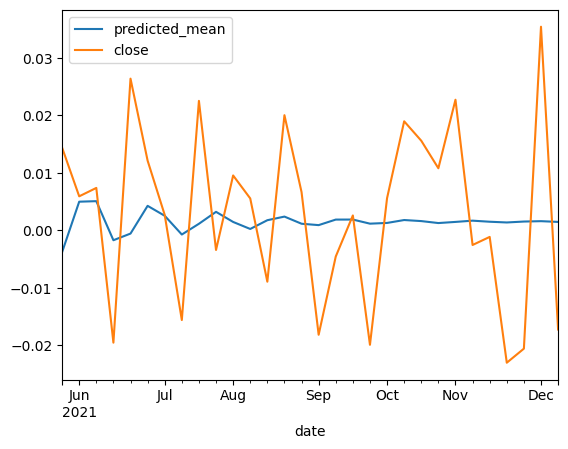

In [32]:
pred.plot(legend=True)
test['close'].plot(legend=True)

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['close']))
print(rmse / test['close'].mean())


5.115078964231916
